In [1]:
library(GenomicFeatures)
library(ChIPseeker)
library(dplyr)
library(ggplot2)
library(tidyr)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required package: GenomicRanges

Loading r

In [3]:
tf_peak_distri <- read.csv("/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/peak_distribution_across_bins_all_tfs.csv")
tf_info <- read.table("/clusterfs/jgi/groups/gentech/homes/romalley/reference/tf_family_clades_organized.tsv",sep = "\t",header=T)

In [4]:
plot_axis_table <- data.frame(bin=c(paste("up_bin",seq(1,20,1),sep="_"),paste("gb_bin",seq(1,10,1),sep="_"),paste("down_bin",seq(1,20,1),sep="_")),
        xaxis=seq(from = 1,to = 50, by = 1))

In [56]:
head(tf_info)

,gene_id,tf_family,tf_name,tf_clade_curated,clade
,<chr>,<chr>,<chr>,<int>,<chr>
1,AT4G01500,ABI3VP1,NGA4,1,ABI3VP1-1
2,AT5G60130,ABI3VP1,AT5G60130,2,ABI3VP1-2
3,AT3G18990,ABI3VP1,VRN1,3,ABI3VP1-3
4,AT2G31230,AP2EREBP,ERF15,1,AP2EREBP-1
5,AT1G01250,AP2EREBP,AT1G01250,1,AP2EREBP-1
6,AT1G03800,AP2EREBP,ERF10,1,AP2EREBP-1


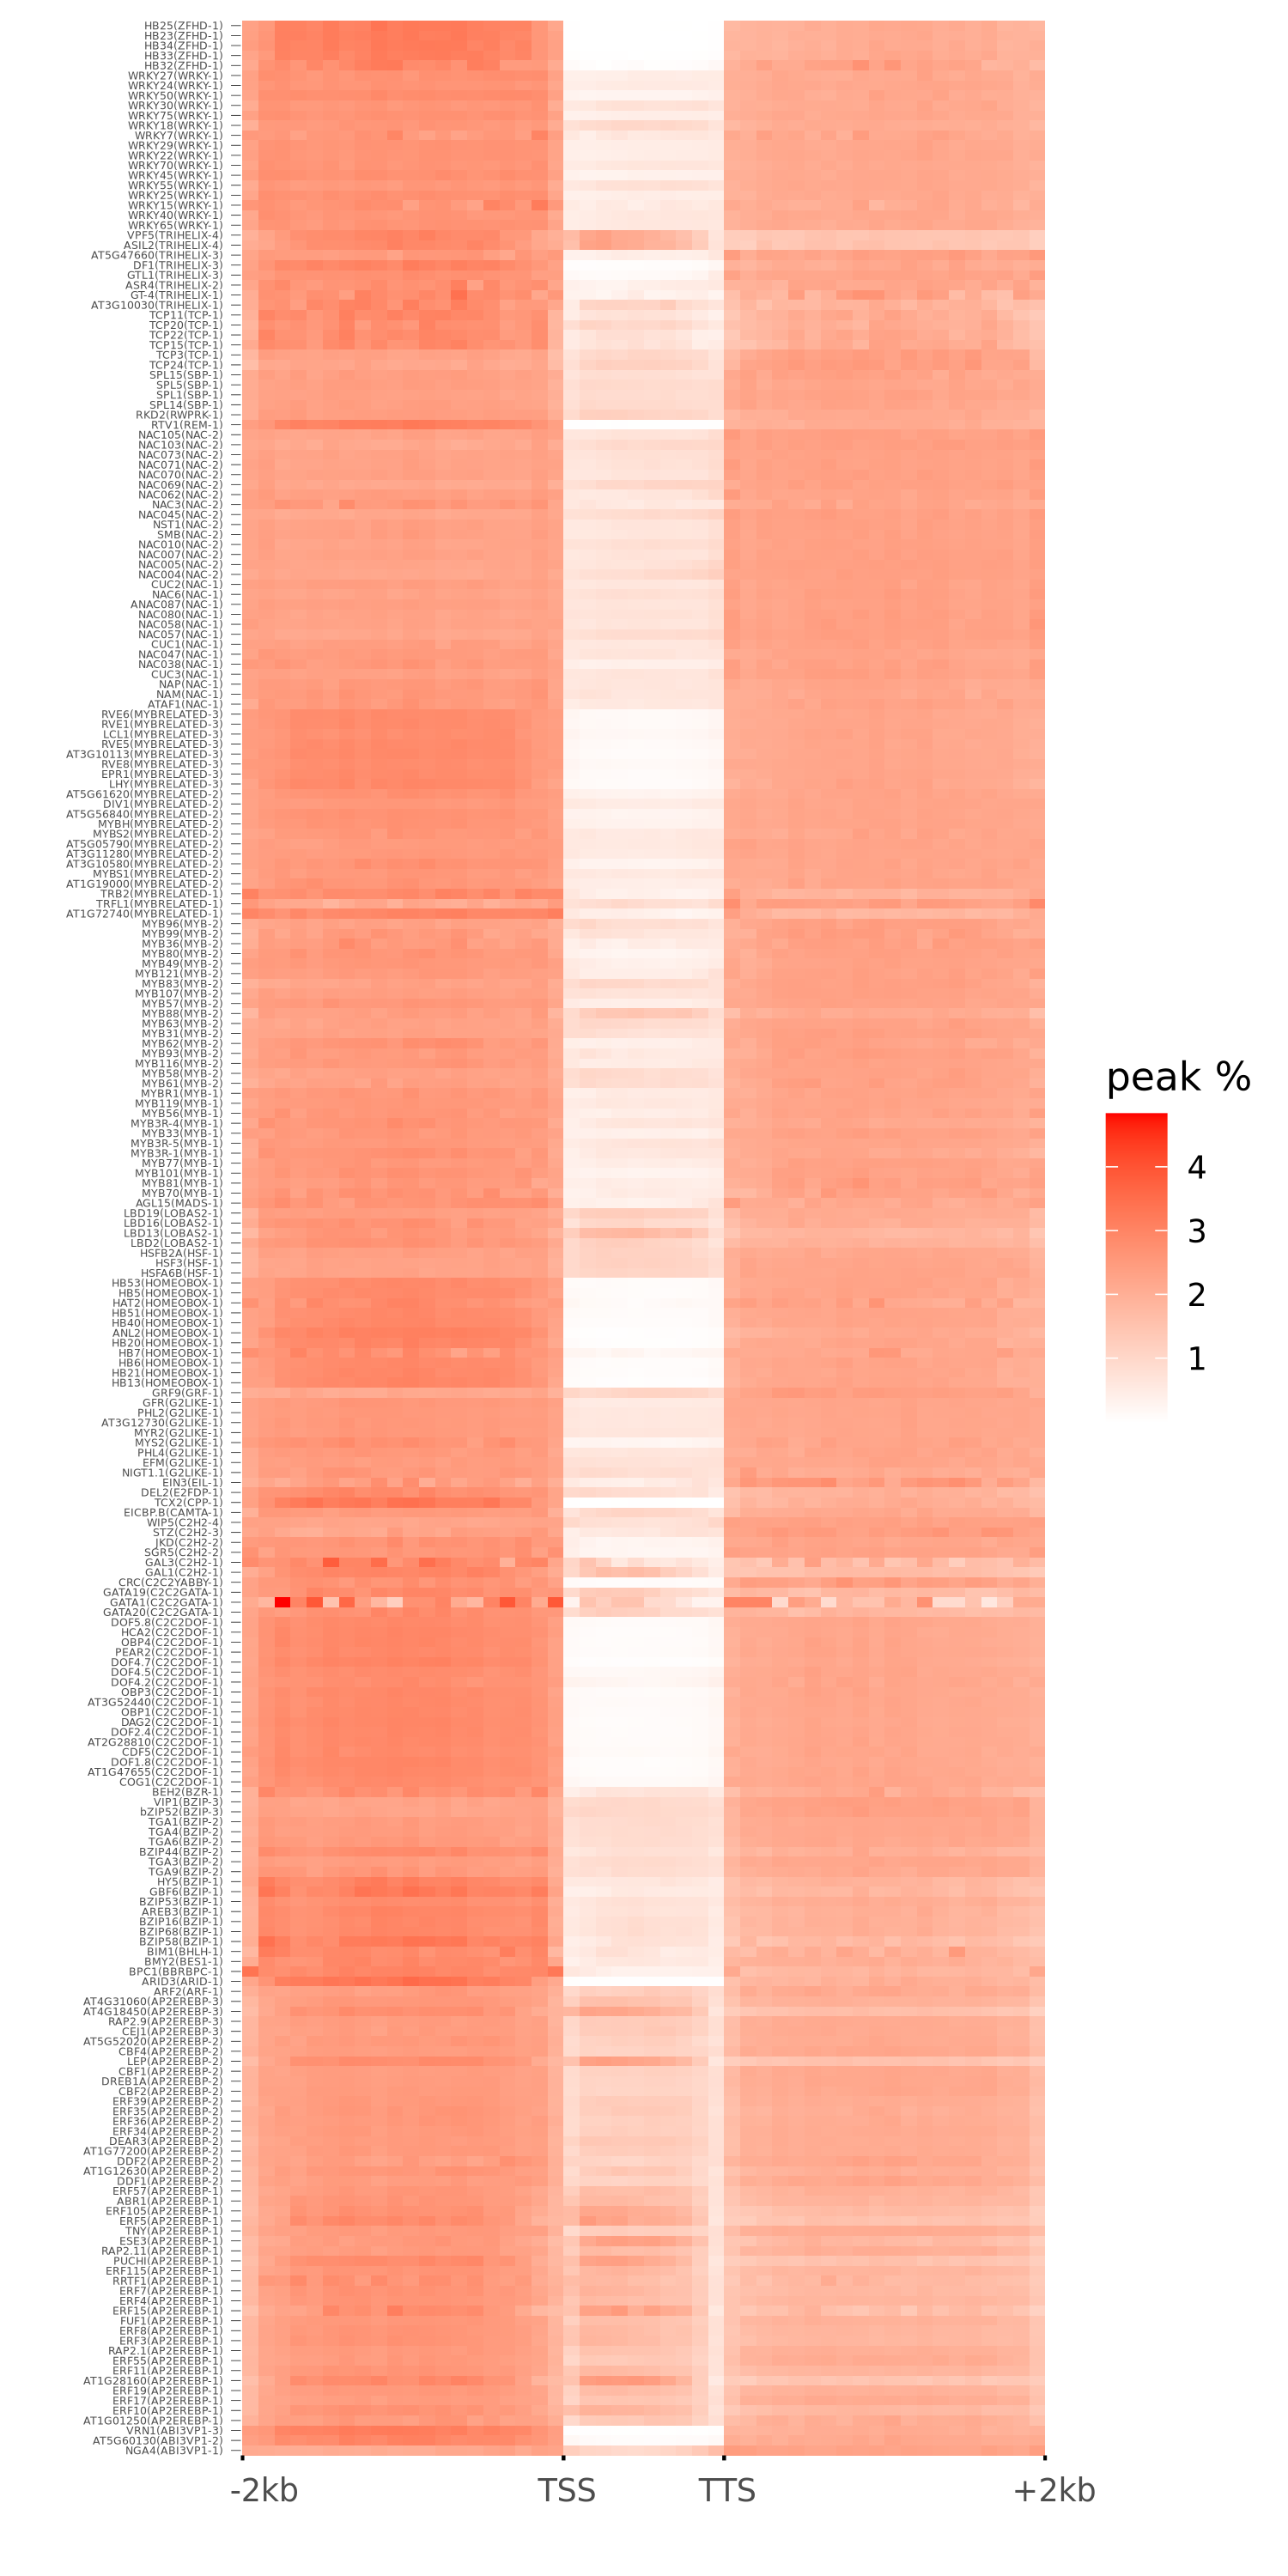

In [66]:
options(repr.plot.width=5,repr.plot.height=10,repr.plot.res=300)
tf_peak_distri %>%
    group_by(tf) %>%
    mutate(peak_frequency=peak_count/sum(peak_count))%>%
    ungroup() %>%
    left_join(tf_info,by=join_by(tf==gene_id)) %>%
    left_join(plot_axis_table,by=join_by(bin_name==bin)) %>%
    mutate(new_name=paste0(tf_name,"(",clade,")")) %>%
    mutate(bin_name=factor(bin_name,levels = (c(paste("up_bin",seq(1,20,1),sep="_"),paste("gb_bin",seq(1,10,1),sep="_"),paste("down_bin",seq(1,20,1),sep="_"))))) %>%
    arrange(clade) %>%
    mutate(new_name=factor(new_name,levels = unique(new_name))) %>%
    ggplot(aes(x=bin_name,y=new_name,fill=peak_frequency*100))+
        geom_tile()+
        annotate("segment",x = 0.5, xend= 0.5, y = 0, yend = 0.5)+
        annotate("segment",x = 20.5, xend= 20.5, y = 0, yend = 0.5)+
        annotate("segment",x = 30.5, xend= 30.5, y = 0, yend = 0.5)+
        annotate("segment",x = 50.5, xend= 50.5, y = 0, yend = 0.5)+
        scale_x_discrete(breaks=c("up_bin_1","up_bin_20","gb_bin_10","down_bin_20"),labels=c("-2kb","TSS","TTS","+2kb"))+
        scale_fill_gradient(low="white", high="red")+
        labs(x="",fill="peak %")+
        theme(axis.ticks.x=element_blank(),
            panel.background = element_blank(),
            panel.grid.major = element_blank(),,
            axis.text.x=element_text(hjust=0.3),
            axis.text.y = element_text(size=3),
            axis.ticks.y=element_line(linewidth = 0.1))+
        labs(y="")

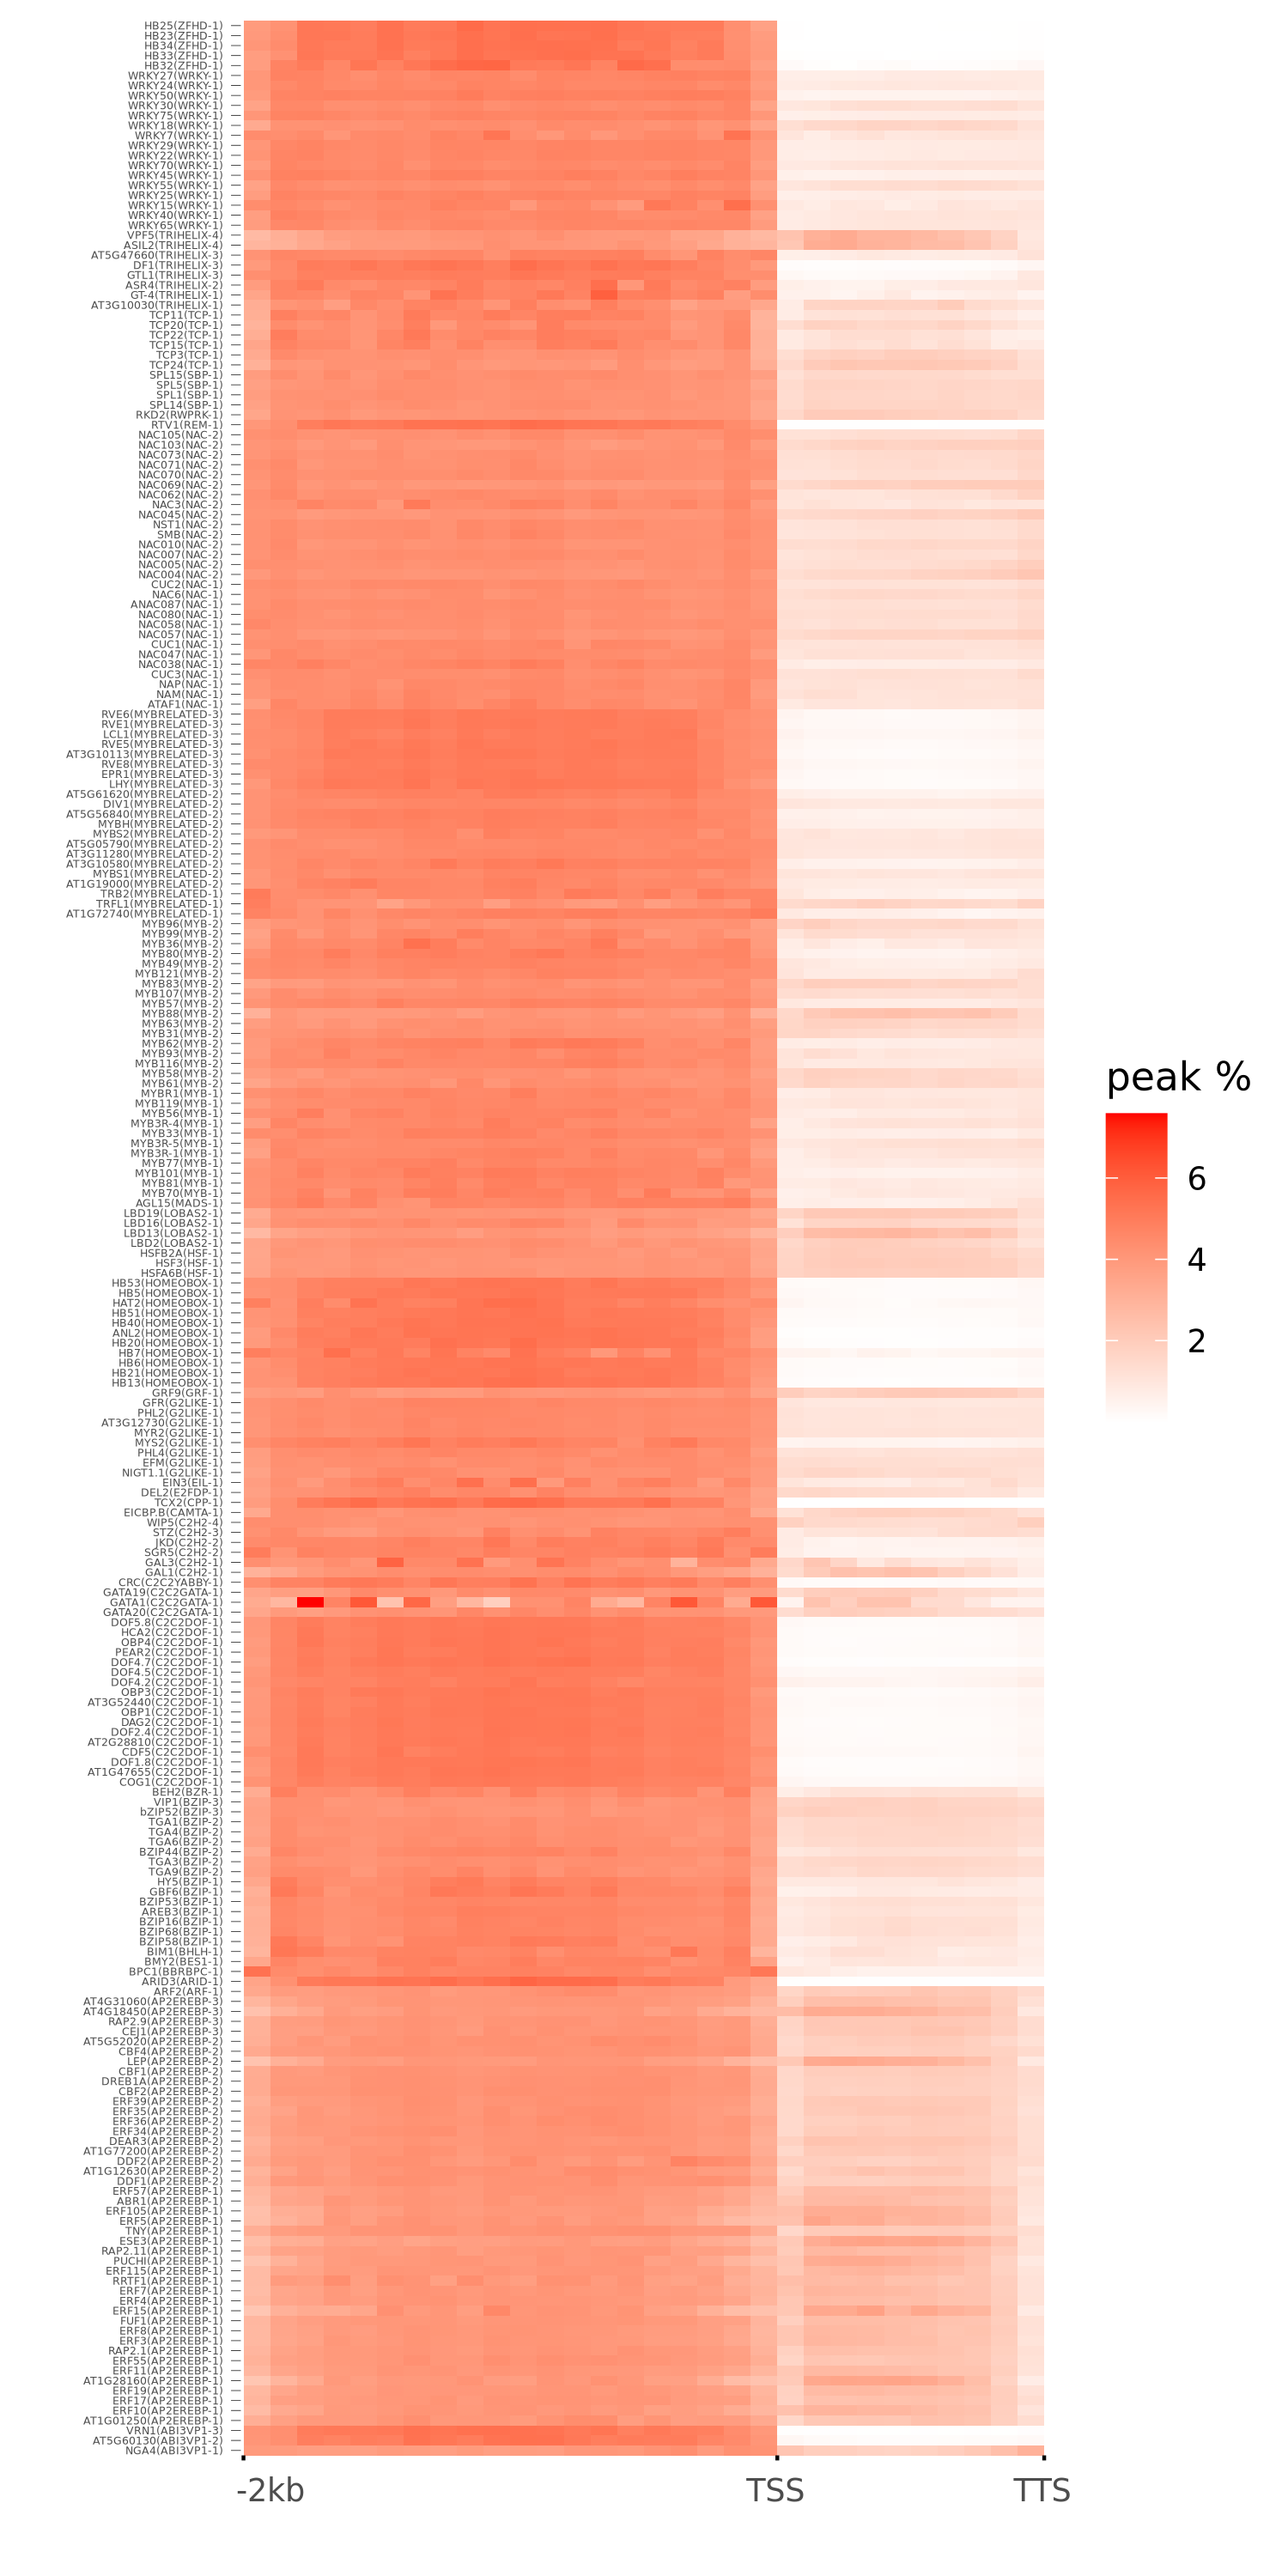

In [68]:
## if ignore the downstream peaks
options(repr.plot.width=5,repr.plot.height=10,repr.plot.res=300)
tf_peak_distri %>%
    filter(!grepl("down",bin_name)) %>%
    group_by(tf) %>%
    mutate(peak_frequency=peak_count/sum(peak_count))%>%
    ungroup() %>%
    left_join(tf_info,by=join_by(tf==gene_id)) %>%
    left_join(plot_axis_table,by=join_by(bin_name==bin)) %>%
    mutate(new_name=paste0(tf_name,"(",clade,")")) %>%
    mutate(bin_name=factor(bin_name,levels = (c(paste("up_bin",seq(1,20,1),sep="_"),paste("gb_bin",seq(1,10,1),sep="_"))))) %>%
    arrange(clade) %>%
    mutate(new_name=factor(new_name,levels = unique(new_name))) %>%
    ggplot(aes(x=bin_name,y=new_name,fill=peak_frequency*100))+
        geom_tile()+
        annotate("segment",x = 0.5, xend= 0.5, y = 0, yend = 0.5)+
        annotate("segment",x = 20.5, xend= 20.5, y = 0, yend = 0.5)+
        annotate("segment",x = 30.5, xend= 30.5, y = 0, yend = 0.5)+
        scale_x_discrete(breaks=c("up_bin_1","up_bin_20","gb_bin_10"),labels=c("-2kb","TSS","TTS"))+
        scale_fill_gradient(low="white", high="red")+
        labs(x="",fill="peak %")+
        theme(axis.ticks.x=element_blank(),
            panel.background = element_blank(),
            panel.grid.major = element_blank(),,
            axis.text.x=element_text(hjust=0.3),
            axis.text.y = element_text(size=3),
            axis.ticks.y=element_line(linewidth = 0.1))+
        labs(y="")

`summarise()` has grouped output by 'clade'. You can override using the
`.groups` argument.


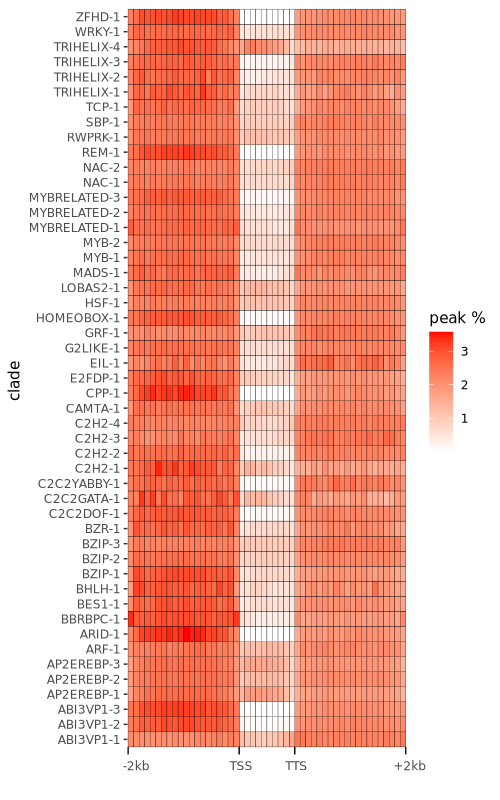

In [78]:
options(repr.plot.width = 5, repr.plot.height = 8, repr.plot.res = 100)
tf_peak_distri %>%
    group_by(tf) %>%
    mutate(peak_frequency=peak_count/sum(peak_count))%>%
    ungroup() %>%
    left_join(tf_info,by=join_by(tf==gene_id)) %>%
    group_by(clade,bin_name) %>%
    summarise(clade_frequency=mean(peak_frequency))%>%
    ungroup() %>%
    left_join(plot_axis_table,by=join_by(bin_name==bin)) %>%
    mutate(bin_name=factor(bin_name,levels = (c(paste("up_bin",seq(1,20,1),sep="_"),paste("gb_bin",seq(1,10,1),sep="_"),paste("down_bin",seq(1,20,1),sep="_"))))) %>%
    ggplot(aes(x=bin_name,y=clade,fill=clade_frequency*100))+
        geom_tile(color = "black",
            lwd = 0.1,
            linetype = 1)+
        annotate("segment",x = 0.5, xend= 0.5, y = 0, yend = 0.5)+
        annotate("segment",x = 20.5, xend= 20.5, y = 0, yend = 0.5)+
        annotate("segment",x = 30.5, xend= 30.5, y = 0, yend = 0.5)+
        annotate("segment",x = 50.5, xend= 50.5, y = 0, yend = 0.5)+
        scale_x_discrete(breaks=c("up_bin_1","up_bin_20","gb_bin_10","down_bin_20"),labels=c("-2kb","TSS","TTS","+2kb"))+
        scale_fill_gradient(low="white", high="red")+
        labs(x="",fill="peak %")+
        theme(axis.ticks.x=element_blank(),
            panel.background = element_blank(),
            panel.grid.major = element_blank(),,
            axis.text.x=element_text(hjust=0.3))

In [ ]:
tf_peak_distri %>%
    group_by(tf) %>%
    mutate(peak_frequency=peak_count/sum(peak_count))%>%
    ungroup() %>%
    left_join(tf_info,by=join_by(tf==gene_id)) %>%
    group_by(clade,bin_name) %>%
    mutate(clade_frequency=summarise(peak_frequency,mean)) %>%
    ungroup() %>%
    left_join(plot_axis_table,by=join_by(bin_name==bin)) %>%
    ggplot(aes(x=xaxis,y=tf,fill=peak_frequency*100))+
        geom_tile()+
        scale_fill_gradient(low="white", high="red")

#### make genome coverage plot with all A.thaliana peaks

Since the genes are streched for too long both upstream and downstream of gene, so the upstream and downstream might overlay, to explore if double assignment for peaks are common,

Firstly count the peaks in each species that are both assigned to upstream and downstream of genes.

In [2]:
Full_anno_table<- read.table("/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/raw_data/N4_filtered-annotated-peaks_minfoldch5_minus-2000bpTSS-to-plus-2000bpTTS_111624.tsv",
header=T,sep="\t",comment.char="",quote="\"",stringsAsFactors=F)

In [ ]:
saveRDS(Full_anno_table,file="/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/raw_data/.rds")

In [52]:
Full_anno_table %>%
filter(species=="Arabidopsis_thaliana_Col-0") %>%
select(peak_name,feature_id,annotated_peak_region) %>%
unique() %>%
group_by(peak_name) %>%
tally() %>%
ungroup()%>%
group_by(n) %>%
tally()

Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.


n,nn
<int>,<int>
1,1819620
2,448797
3,163
4,2


In [5]:
Full_anno_table %>%
filter(species=="Arabidopsis_thaliana_Col-0") %>%
select(peak_name,feature_id,annotated_peak_region) %>%
unique() %>%
nrow()

[1] 2717711

In [74]:
## how many genomic regions fdo each TF target in one orthogroup
Full_anno_table %>%
filter(n_cons_species_minfrac0==4) %>%
select(tf,orthogroup,annotated_peak_region) %>%
group_by(tf,orthogroup) %>%
summarise(unique_type = n_distinct(annotated_peak_region)) %>%
head()

`summarise()` has grouped output by 'tf'. You can override using the `.groups`
argument.


tf,orthogroup,unique_type
<chr>,<chr>,<int>
AT1G01060,OG0000033,3
AT1G01060,OG0000034,3
AT1G01060,OG0000046,5
AT1G01060,OG0000047,5
AT1G01060,OG0000049,3
AT1G01060,OG0000050,4


### count the Peak numbers c1-c4 in each region


Start from the beginning, how many peaks are identified in each species, and how many c1-c4 peaks are there?

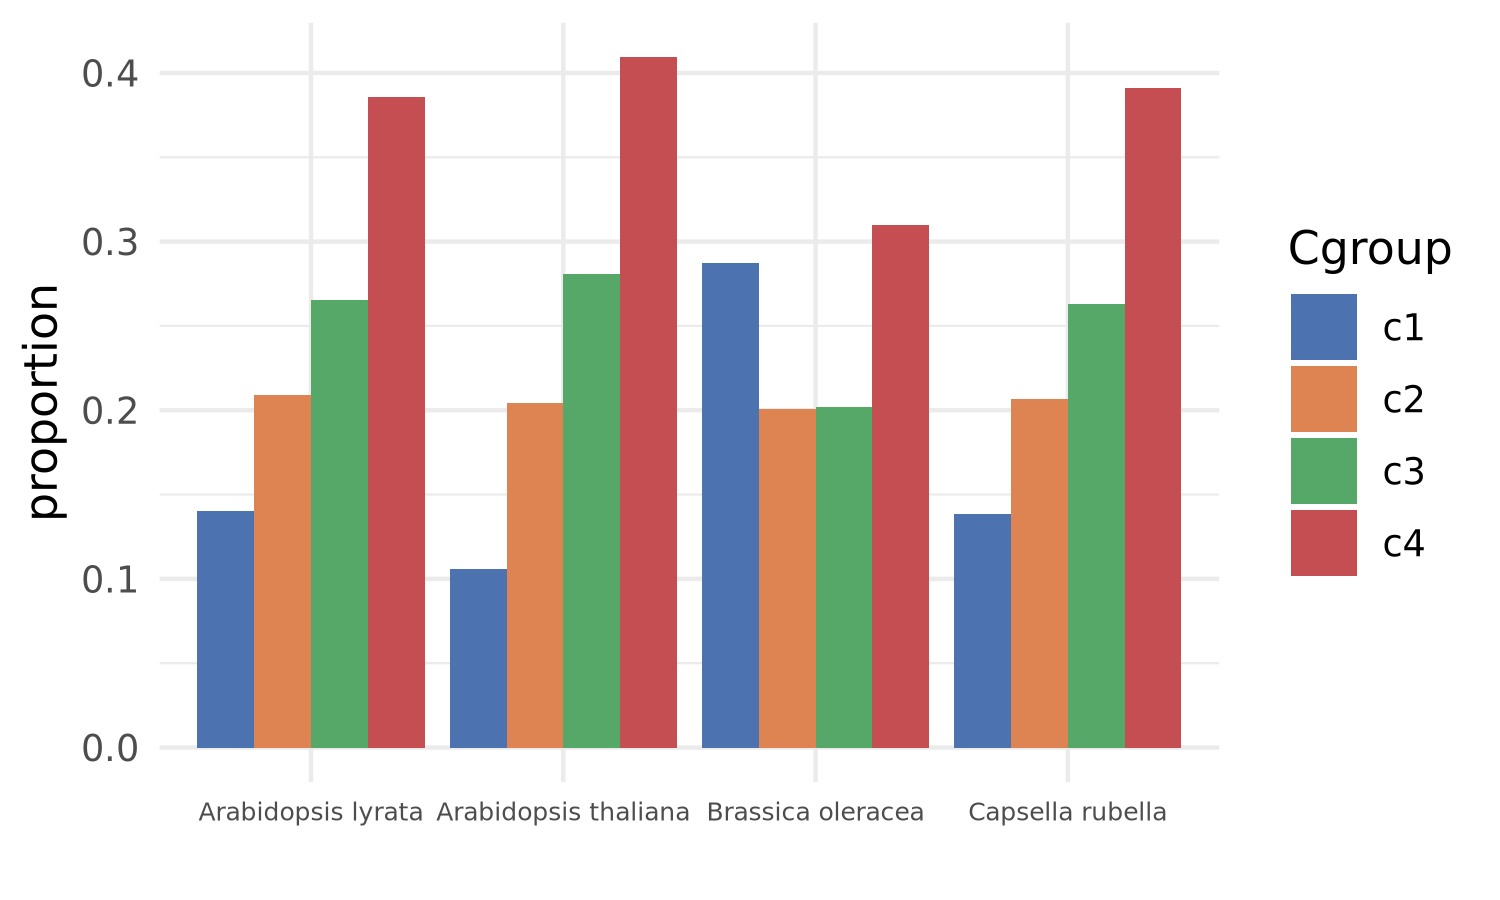

In [49]:
options(repr.plot.width=5,repr.plot.height=3,repr.plot.res=300)
Full_anno_table %>%
    group_by(species,n_cons_species_minfrac0) %>%
    tally() %>%
    ungroup() %>%
    group_by(species) %>%
    mutate(frequency=n/sum(n)) %>%
    ungroup() %>%
    mutate(species = factor(species,
    levels = c("Arabidopsis_lyrata_MN47","Arabidopsis_thaliana_Col-0","Brassica_oleracea_TO1000DH3","Capsella_rubella_Monte_Gargano"),
    labels=c("Arabidopsis lyrata","Arabidopsis thaliana","Brassica oleracea","Capsella rubella"))) %>%
    mutate(n_cons_species_minfrac0=as.character(n_cons_species_minfrac0)) %>%
    ggplot(aes(x=species,y=frequency,fill=n_cons_species_minfrac0))+
        geom_col(position = "dodge")+
    theme_minimal()+
    scale_fill_manual(values = c("1"="#4c72b0","2"="#dd8452","3"="#55a868","4"="#c44e52"),
                    labels=c("c1","c2","c3","c4"))+
    labs(x="",y="proportion",fill="Cgroup")+
    theme(axis.text.x = element_text(size=6))
    


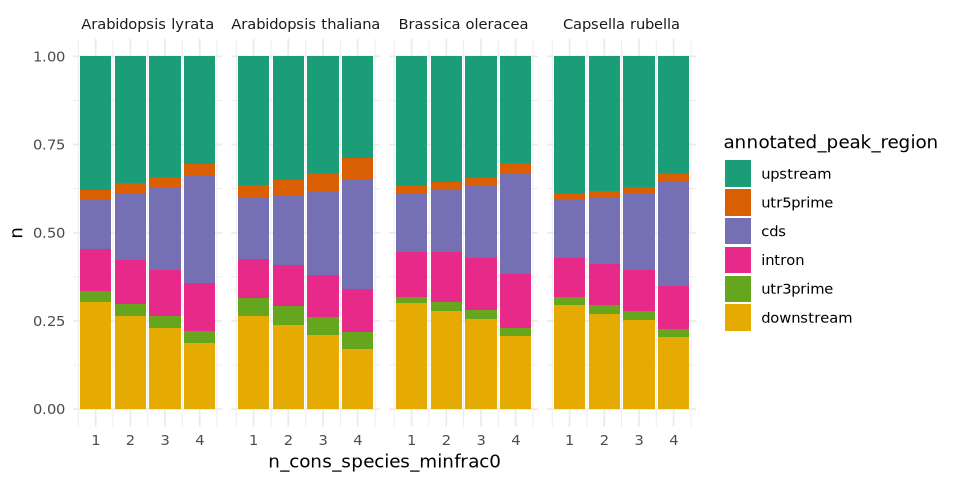

In [24]:
options(repr.plot.width=8,repr.plot.height=4,resolution=300)
Full_anno_table %>%
group_by(species,n_cons_species_minfrac0,annotated_peak_region) %>%
tally() %>%
group_by(species,n_cons_species_minfrac0) %>%
mutate(frequency=n/sum(n)) %>%
ungroup() %>%
mutate(annotated_peak_region = factor(annotated_peak_region,
    levels = c("upstream","utr5prime","cds","intron","utr3prime","downstream"))) %>%
mutate(species = factor(species,
    levels = c("Arabidopsis_lyrata_MN47","Arabidopsis_thaliana_Col-0","Brassica_oleracea_TO1000DH3","Capsella_rubella_Monte_Gargano"),
    labels=c("Arabidopsis lyrata","Arabidopsis thaliana","Brassica oleracea","Capsella rubella"))) %>%
ggplot(aes(x=n_cons_species_minfrac0,y=n,fill=annotated_peak_region))+
geom_col(position = "fill")+
facet_grid(.~species)+
theme_minimal()+
scale_fill_brewer(palette = "Dark2")


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


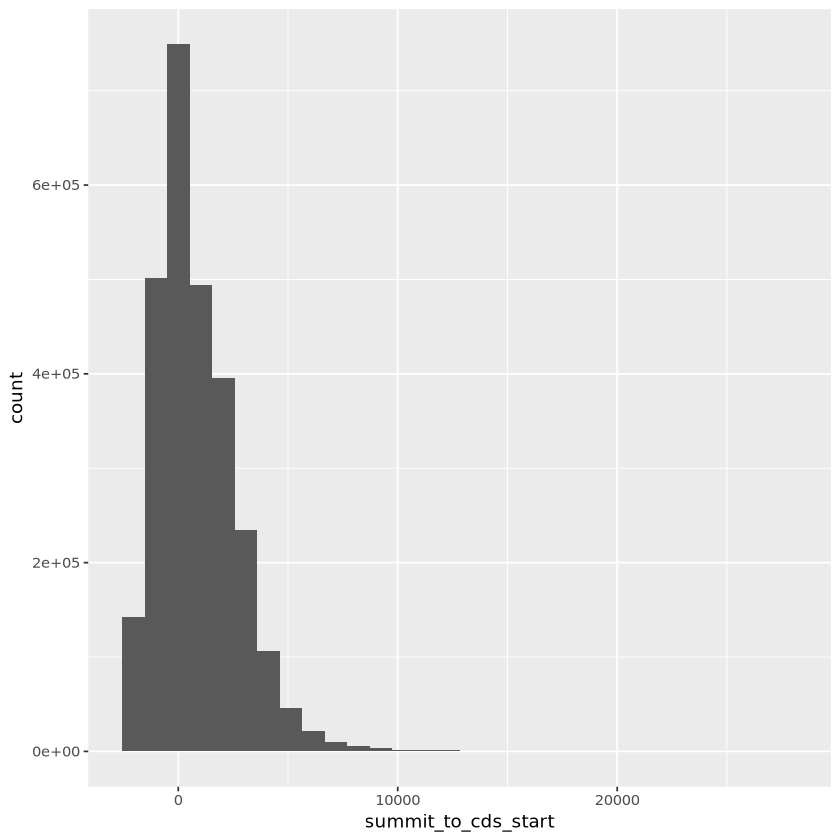

In [14]:
## explore how many c4 peaks are actually in different regions



In [ ]:
## how many genes 